In [1]:
#solution for question 2 

## Logistic Regression Math Derivation

We start with the logistic regression model:

$$
\hat{y} = \sigma(w^T x + b)
$$

where the sigmoid is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

---

### (a) Decision Boundary

The decision boundary occurs where 

$$
\hat{y} = 0.5
$$

Substitute into the sigmoid:
$$
\sigma(z) = 0.5 \quad \Rightarrow \quad \frac{1}{1+e^{-z}} = 0.5
$$

Solving for \(z\):
$$
z = w^T x + b = 0
$$

Thus, the decision boundary is:

$$
{w^T x + b = 0}
$$

---

### (b) Shape of the Decision Boundary

- The equation:

$$
w^T x + b = 0
$$

represents a linear hyperplane:

- In 2D: a straight line  
- In 3D: a plane  
- In higher dimensions: a hyperplane  

---

### Effect of Weights

- The direction of \(w\) controls the orientation of the boundary.  
- The magnitude of \(w\) controls the steepness of the sigmoid:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

- Large \(\|w\|\): steep transition → confident predictions.  
- Small \(\|w\|\): gradual transition → less confident predictions.  


Weights: [2.82885458 2.58875509] Bias: -0.019345176445724827


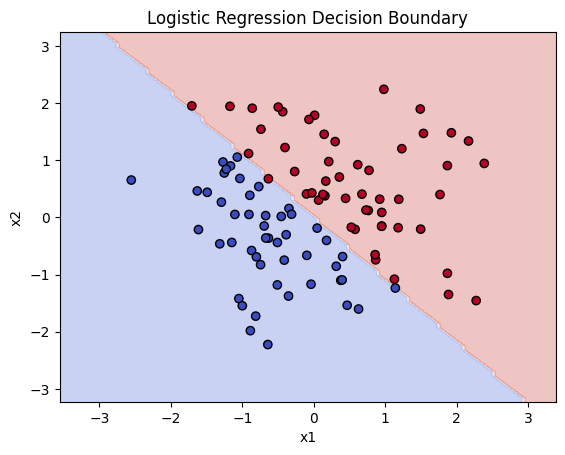

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Generating a timepass dataset
np.random.seed(0)
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int) 
clf = LogisticRegression()
clf.fit(X, y)
w = clf.coef_[0]
b = clf.intercept_[0]
print("Weights:", w, "Bias:", b)

# Plotting decision boundary
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


In [3]:
# solution for question 8

In [4]:
from PIL import Image

starting img:


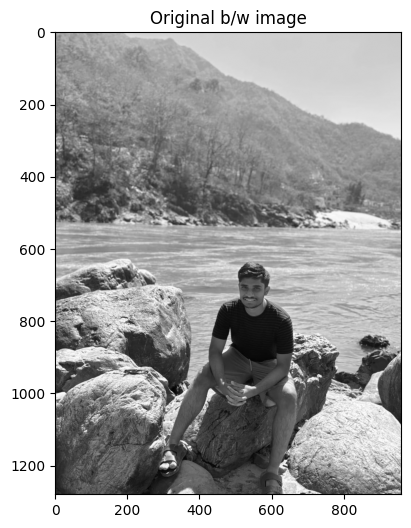

In [5]:
image_path = r"C:\Users\ANIRUTH\open-lecture-assignments-y25\Anirudh\assignment 4\img.jpg"
color_image = Image.open(image_path)
grayscale_image = color_image.convert('L')
A = np.array(grayscale_image)
print("starting img:")
plt.figure(figsize=(6, 6))
plt.imshow(A, cmap='gray')
plt.title("Original b/w image")
plt.show()



In [6]:
U, s, Vh = np.linalg.svd(A, full_matrices=False)


In [7]:
print(f"Shape of original matrix A: {A.shape}")
print(f"Shape of U matrix: {U.shape}")
print(f"Shape of s array: {s.shape}")
print(f"Shape of Vh matrix: {Vh.shape}")


Shape of original matrix A: (1280, 960)
Shape of U matrix: (1280, 960)
Shape of s array: (960,)
Shape of Vh matrix: (960, 960)


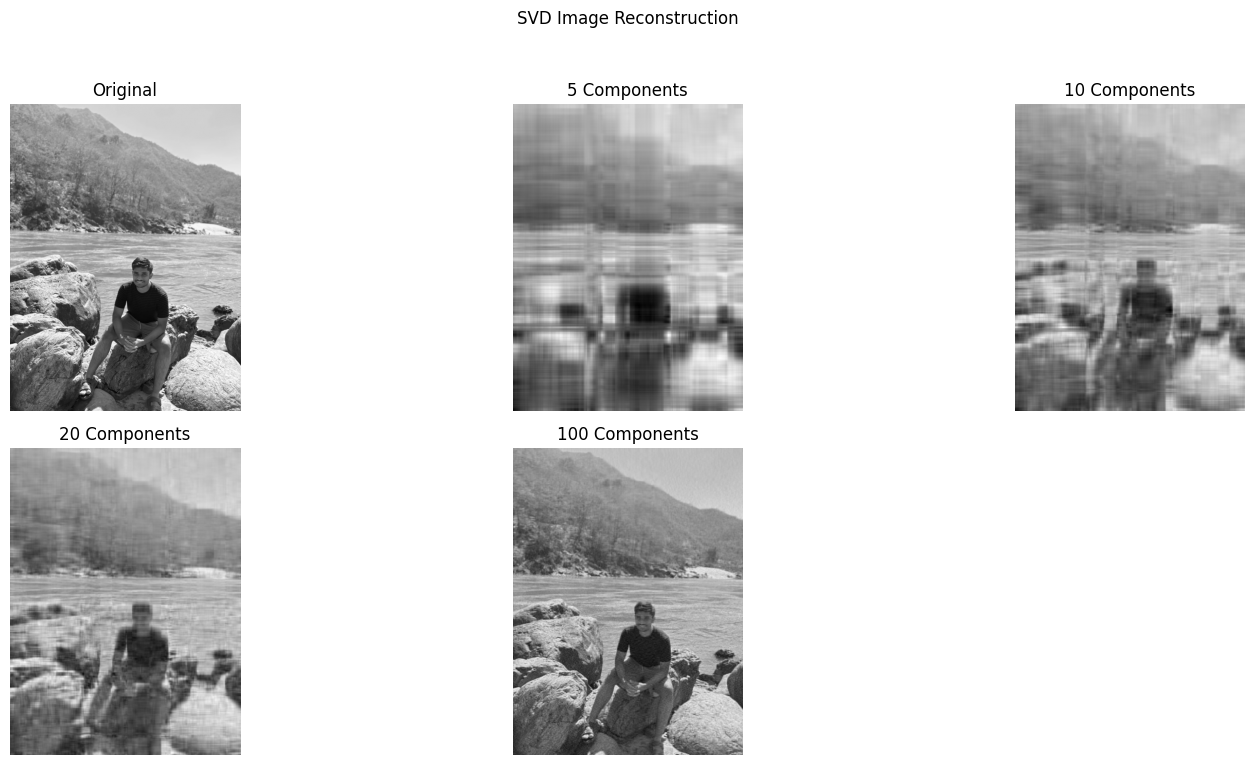

In [8]:
components = [5, 10, 20, 100]

plt.figure(figsize=(16, 8))

plt.subplot(2, 3, 1)
plt.imshow(A, cmap='gray')
plt.title("Original")
plt.axis('off')

plot_num = 2 
for k in components:
    reconstructed_matrix = U[:, :k] @ np.diag(s[:k]) @ Vh[:k, :]
    plt.subplot(2, 3, plot_num)
    plt.imshow(reconstructed_matrix, cmap='gray')
    plt.title(f"{k} Components")
    plt.axis('off')
    plot_num += 1

plt.suptitle("SVD Image Reconstruction", )
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**#solution for question 1**


## The Problem: Overdispersion in Count Data 
When we model count data (e.g., the number of emails received per hour, the number of patients arriving at a hospital), the go-to model is often the **Poisson distribution**. A key assumption of the Poisson distribution is that the **mean is equal to the variance**:

$$ E[Y] = \text{Var}(Y) = \lambda $$

However,in some cases the variance is much larger than the mean. This is called **overdispersion**. Using a Poisson model on overdispersed data can lead to incorrect conclusions.

The **Negative Binomial distribution** is an excellent alternative because it has an extra parameter that allows the variance to be greater than the mean. Its variance is given by:

$$ \text{Var}(Y) = \mu + \frac{\mu^2}{\theta} $$

Here, $\mu$ is the mean and $\theta$ is the **dispersion parameter**. As $\theta \to \infty$, the second term goes to zero, and the Negative Binomial distribution converges to the Poisson distribution.
For a distribution to be used in the standard GLM framework, it must belong to the **exponential family** of distributions. Let's prove that the Negative Binomial distribution meets this criterion.

## The Exponential Family of Distributions


$$ f(y | \eta) = h(y) \exp\left( \eta T(y) - A(\eta) \right) $$


Our goal is to take the Probability Mass Function (PMF) of the Negative Binomial distribution and rearrange it algebraically to fit this structure.

## The Proof: Showing Negative Binomial is in the Exponential Family 

The PMF for the Negative Binomial distribution, parameterized by its mean $\mu$ and dispersion parameter $\theta$, is:

$$ P(Y=y | \mu, \theta) = \frac{\Gamma(y+\theta)}{\Gamma(y+1)\Gamma(\theta)} \left(\frac{\theta}{\theta+\mu}\right)^\theta \left(\frac{\mu}{\mu+\theta}\right)^y $$

Let's start rearranging! The trick is often to take the log of the PMF, rearrange, and then exponentiate it back.

**Step 1: Rewrite the PMF using algebraic manipulation.**

We can separate the terms involving $\mu$ from the terms involving $y$.

$$ P(Y=y) = \frac{\Gamma(y+\theta)}{y!\Gamma(\theta)} \left(\frac{\mu}{\theta+\mu}\right)^y \left(1 - \frac{\mu}{\theta+\mu}\right)^\theta $$

**Step 2: Express the PMF inside an exponential function.**

We can write any positive expression $X$ as $\exp(\log(X))$. Let's apply this to our PMF.

$$ P(Y=y) = \exp \left[ \log \left( \frac{\Gamma(y+\theta)}{y!\Gamma(\theta)} \right) + y \log \left( \frac{\mu}{\theta+\mu} \right) + \theta \log \left( \frac{\theta}{\theta+\mu} \right) \right] $$

**Step 3: Identify the components of the exponential family form.**

Now we match the terms in our expression to the general form $h(y) \exp\left( \eta T(y) - A(\eta) \right)$.

* The term that is purely a function of $y$ will be part of $h(y)$. Let's group the gamma functions together:
    $$ h(y) = \frac{\Gamma(y+\theta)}{y!\Gamma(\theta)} $$
    *(Note: For this to be a valid exponential family representation, $\theta$ is assumed to be a known, fixed parameter.)*

* The term that is a product of a function of $y$ and a function of the parameters will give us $\eta$ and $T(y)$. This is clearly the middle term.
    $$ \eta T(y) = y \log \left( \frac{\mu}{\theta+\mu} \right) $$
    From this, we can identify:
    $$ T(y) = y $$
    $$ \eta = \log \left( \frac{\mu}{\theta+\mu} \right) $$

* The remaining term will give us our $-A(\eta)$.
    $$ -A(\eta) = \theta \log \left( \frac{\theta}{\theta+\mu} \right) $$
    However, $A$ must be a function of $\eta$, not $\mu$. So, we need to express $\frac{\theta}{\theta+\mu}$ in terms of $\eta$. From our definition of $\eta$:
    $$ e^\eta = \frac{\mu}{\theta+\mu} $$
    Since $\frac{\theta}{\theta+\mu} = 1 - \frac{\mu}{\theta+\mu}$, we have:
    $$ \frac{\theta}{\theta+\mu} = 1 - e^\eta $$
    Now we can substitute this back into our expression for $-A(\eta)$:
    $$ -A(\eta) = \theta \log(1 - e^\eta) $$
    Therefore:
    $$ A(\eta) = -\theta \log(1 - e^\eta) $$


This confirms that the Negative Binomial distribution (with a known $\theta$) is a member of the exponential family.

## What This Means for its Use in GLMs 

Because the Negative Binomial distribution is in the exponential family, it fits perfectly into the Generalized Linear Model (GLM) framework. This has several powerful implications:

1.  **Unified Framework**: It allows us to model Negative Binomial-distributed responses using the same theory and algorithms 

2.  **Link Function**: The GLM framework connects the mean of the response variable, $\mu$, to a linear combination of predictor variables, $X\beta$, through a link function $g(\cdot)$:
    $$ g(\mu) = X\beta $$
    Using a log link ensures that the  mean $\mu = \exp(X\beta)$ is always positive

3.  **Maximum Likelihood Estimation**: Being part of this family guarantees that the likelihood function is well-behaved, allowing us to find the Maximum Likelihood Estimates (MLEs) for the regression coefficients ($\beta$). In practice, the dispersion parameter $\theta$ is often estimated simultaneously with the $\beta$ coefficients using MLE.

In summary, proving that the Negative Binomial distribution is a member of the exponential family is not just a mathematical exercise. It's the theoretical foundation that allows us to use it as a robust, flexible, and reliable tool for modeling overdispersed count data within the powerful and well-understood GLM framework.

**#solution for question6**

In [9]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA


In [10]:
plt.style.use('seaborn-v0_8-whitegrid')


In [13]:

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

n_samples, h, w = lfw_people.images.shape

print(f"Number of samples: {n_samples}")
print(f"Height of each image: {h} pixels")
print(f"Width of each image: {w} pixels")


Number of samples: 1288
Height of each image: 50 pixels
Width of each image: 37 pixels


Number of samples (images): 1288
Height of each image: 50 pixels
Width of each image: 37 pixels
Shape of the data matrix (X): (1288, 1850) (n_samples, n_features)


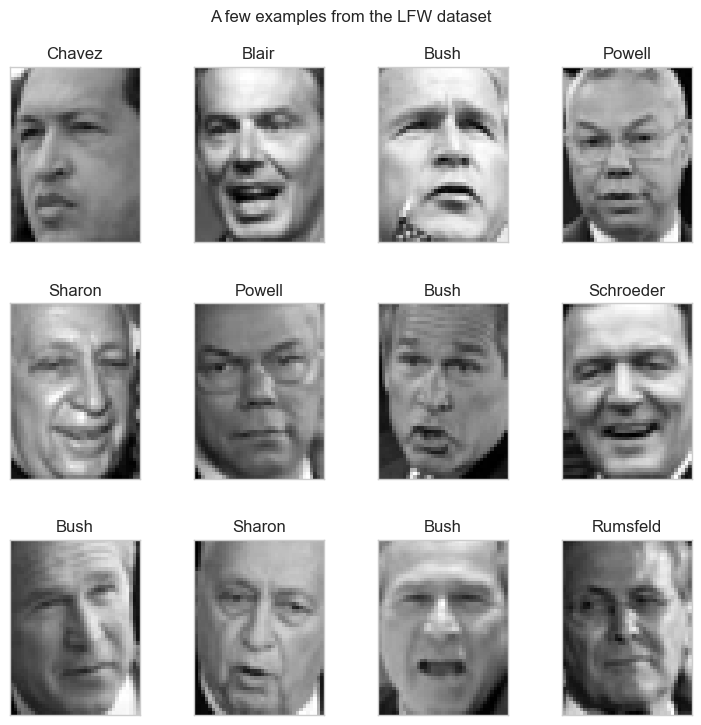

In [14]:
n_samples, h, w = lfw_people.images.shape
print(f"Number of samples (images): {n_samples}")
print(f"Height of each image: {h} pixels")
print(f"Width of each image: {w} pixels")

X = lfw_people.data
n_features = X.shape[1]
print(f"Shape of the data matrix (X): {X.shape} (n_samples, n_features)")

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

target_names = lfw_people.target_names
y = lfw_people.target
sample_titles = [f"{target_names[y[i]].split()[-1]}" for i in range(12)]

plot_gallery(X, sample_titles, h, w)
plt.suptitle("A few examples from the LFW dataset")
plt.show()


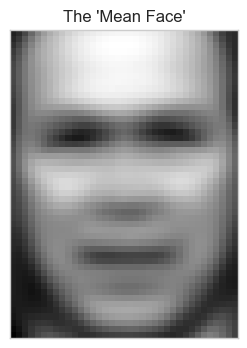

Calculating covariance matrix and its eigen-decomposition...
Done.
Sorting eigenvalues and eigenvectors...
Done.

Shape of eigenvalues vector: (1288,)
Shape of eigenvectors matrix: (1850, 1288)


In [15]:
mean_face = np.mean(X, axis=0)
X_centered = X - mean_face

plt.figure(figsize=(4, 4))
plt.imshow(mean_face.reshape((h, w)), cmap=plt.cm.gray)
plt.title("The 'Mean Face'")
plt.xticks(())
plt.yticks(())
plt.show()

print("Calculating covariance matrix and its eigen-decomposition...")
C_prime = (X_centered @ X_centered.T) / (n_samples - 1)
eigenvalues, eigenvectors_prime = np.linalg.eigh(C_prime)

eigenvectors = X_centered.T @ eigenvectors_prime
eigenvectors = eigenvectors / np.linalg.norm(eigenvectors, axis=0)
print("Done.")

print("Sorting eigenvalues and eigenvectors...")
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices] # Sort columns of eigenvectors
print("Done.")

print(f"\nShape of eigenvalues vector: {eigenvalues.shape}")
print(f"Shape of eigenvectors matrix: {eigenvectors.shape}")

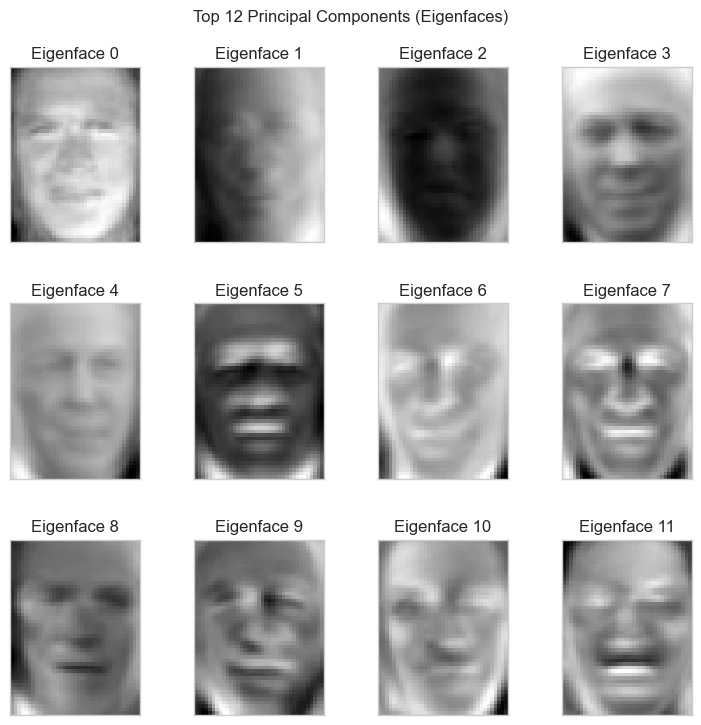

In [16]:
eigenfaces = eigenvectors.T.reshape((eigenvectors.shape[1], h, w))

eigenface_titles = ["Eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.suptitle("Top 12 Principal Components (Eigenfaces)")
plt.show()

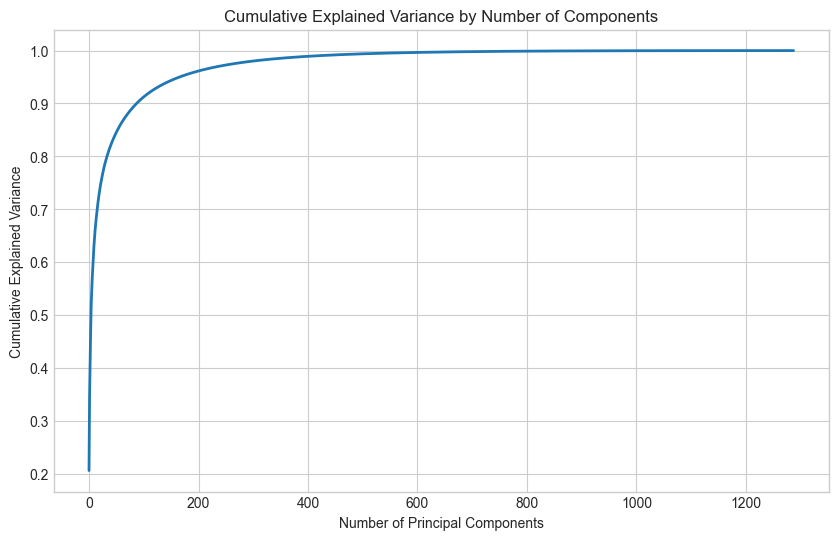

Information captured by top 10 components: 62.99%
Information captured by top 20 components: 73.28%
Information captured by top 50 components: 84.36%
Information captured by top 100 components: 91.17%


In [17]:
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, linewidth=2)
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

for k in [10, 20, 50, 100]:
    info_captured = cumulative_explained_variance[k-1] * 100
    print(f"Information captured by top {k} components: {info_captured:.2f}%")

In [ ]:
def reconstruct_faces(X_centered, eigenvectors, mean_face, k, image_index=5):
    top_k_eigenvectors = eigenvectors[:, :k]
    weights = X_centered[image_index, :] @ top_k_eigenvectors

    reconstructed_centered_face = top_k_eigenvectors @ weights

    reconstructed_face = reconstructed_centered_face + mean_face
    return reconstructed_face

ks = [10, 50, 100, 250]
n_faces_to_show = 4
fig, axes = plt.subplots(n_faces_to_show, len(ks) + 1, figsize=(12, 10))

for i in range(n_faces_to_show):
    axes[i, 0].imshow(X[i].reshape((h,w)), cmap=plt.cm.gray)
    axes[i, 0].set_title("Original")
    axes[i, 0].axis('off')
    for j, k in enumerate(ks):
        reconstructed = reconstruct_faces(X_centered, eigenvectors, mean_face, k, image_index=i)
        axes[i, j+1].imshow(reconstructed.reshape((h,w)), cmap=plt.cm.gray)
        axes[i, j+1].set_title(f"k = {k}")
        axes[i, j+1].axis('off')

plt.suptitle("Reconstruction with Different Numbers of Components")
plt.show()

In [ ]:
k = 150 
pca = PCA(n_components=k, svd_solver='randomized', whiten=False).fit(X)
sklearn_eigenfaces = pca.components_
plot_gallery(sklearn_eigenfaces, eigenface_titles, h, w)
plt.suptitle("Top 12 Eigenfaces from Scikit-Learn's PCA")
plt.show()
X_projected = pca.transform(X)
X_reconstructed_sklearn = pca.inverse_transform(X_projected)
reconstruction_titles = ["Original", "Manual PCA (k=150)", "Scikit-Learn PCA (k=150)"]
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes[0].imshow(X[0].reshape((h,w)), cmap=plt.cm.gray)
axes[0].set_title(reconstruction_titles[0])
manual_recon = reconstruct_faces(X_centered, eigenvectors, mean_face, k=150, image_index=0)
axes[1].imshow(manual_recon.reshape((h,w)), cmap=plt.cm.gray)
axes[1].set_title(reconstruction_titles[1])
axes[2].imshow(X_reconstructed_sklearn[0].reshape((h,w)), cmap=plt.cm.gray)
axes[2].set_title(reconstruction_titles[2])
for ax in axes: ax.axis('off')
plt.show()
difference = np.linalg.norm(manual_recon - X_reconstructed_sklearn[0])
print(f"Difference between manual and scikit-learn reconstruction: {difference:.6f}")
print("(A small value indicates they are virtually identical)")

In [ ]:
from sklearn.linear_model import LinearRegression

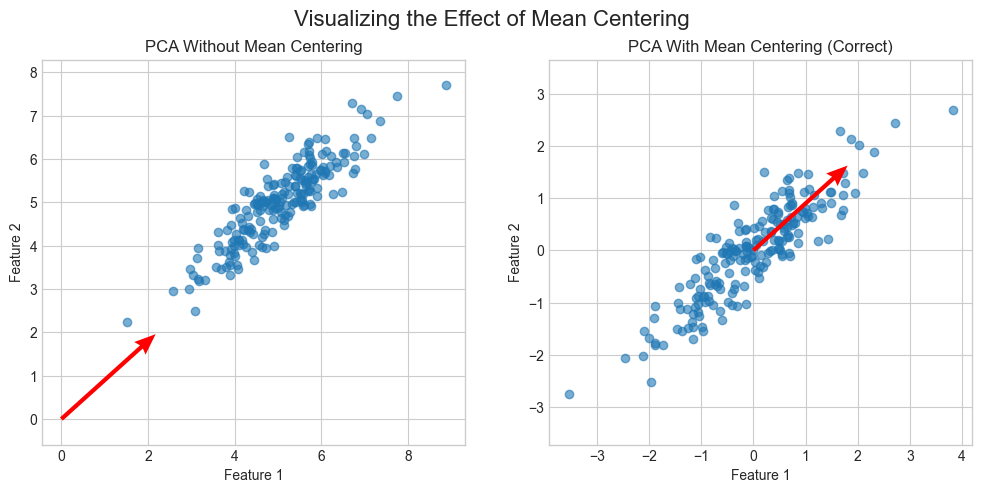

In [18]:
np.random.seed(42)
X_original = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T
X_original = X_original + [5, 5]
pca_no_center = PCA(n_components=1)
pca_no_center.fit(X_original)
pc1_no_center = pca_no_center.components_[0]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_original[:, 0], X_original[:, 1], alpha=0.6)
origin = [0, 0]
plt.quiver(*origin, *pc1_no_center * 3, color='r', scale=10, width=0.01, headwidth=4)
plt.title("PCA Without Mean Centering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis('equal')
plt.grid(True)

X_centered = X_original - np.mean(X_original, axis=0)
pca_center = PCA(n_components=1)
pca_center.fit(X_centered)
pc1_center = pca_center.components_[0]
plt.subplot(1, 2, 2)
plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.6)
origin = [0, 0] 
plt.quiver(*origin, *pc1_center * 3, color='r', scale=10, width=0.01, headwidth=4)
plt.title("PCA With Mean Centering (Correct)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis('equal')
plt.grid(True)
plt.suptitle("Visualizing the Effect of Mean Centering", fontsize=16)
plt.show()


In [19]:
demo_data = np.array([[10, 20, 30],
                      [12, 22, 32],
                      [8,  18, 28],
                      [10, 20, 30]])

mean_axis0 = np.mean(demo_data, axis=0)
print(f"Data shape: {demo_data.shape}")
print(f"Mean : {mean_axis0}")
print(f"Shape : {mean_axis0.shape}\n")

mean_axis1 = np.mean(demo_data, axis=1)
print(f"Mean along axis=1 (INCORRECT): {mean_axis1}")
print(f"Shape of incorrect : {mean_axis1.shape}")


Data shape: (4, 3)
Mean : [10. 20. 30.]
Shape : (3,)

Mean along axis=1 (INCORRECT): [20. 22. 18. 20.]
Shape of incorrect : (4,)


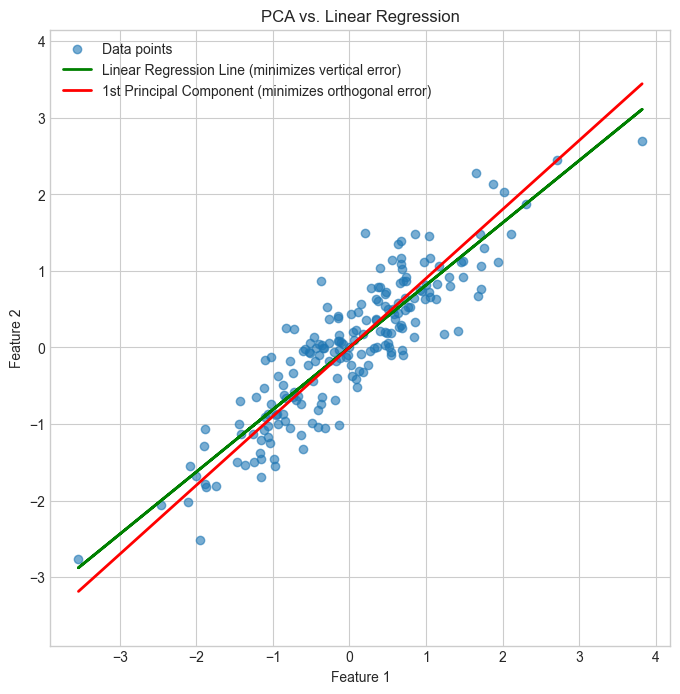

Slope of Linear Regression Line: 0.81
Slope of PCA (PC1) Line: 0.90


In [21]:

from sklearn.linear_model import LinearRegression
X = X_centered[:, 0].reshape(-1, 1) # Feature 1
y = X_centered[:, 1] # Feature 2

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

slope_pca = pc1_center[1] / pc1_center[0]
x_pca = np.linspace(X.min(), X.max(), 100)
y_pca = slope_pca * x_pca

plt.figure(figsize=(8, 8))
plt.scatter(X, y, alpha=0.6, label='Data points')
plt.plot(X, y_pred, color='g', linewidth=2, label='Linear Regression Line (minimizes vertical error)')
plt.plot(x_pca, y_pca, color='r', linewidth=2, label='1st Principal Component (minimizes orthogonal error)')
plt.title("PCA vs. Linear Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

print(f"Slope of Linear Regression Line: {lin_reg.coef_[0]:.2f}")
print(f"Slope of PCA (PC1) Line: {slope_pca:.2f}")


# 5. Representing Piecewise & Continuous Functions with Trees

<hr>

## (a) Exact Representation of a Piecewise-Constant Function



 A decision tree is perfectly suited to represent a piecewise-constant function.

A decision tree works by repeadetly  partitioning the input space. For a 1D function on $\mathbb{R}$, this means splitting the number line. The structure of a step function aligns perfectly with this process.
* A step function is defined by $L-1$ breakpoints where the function's value changes.
* We can build a decision tree where each internal node is a test  corresponding to one of these breakpoints.
* Each leaf node of the tree will correspond to one of the $L$ intervals where the function's value is constant. The value stored at that leaf will be the function's constant output for that interval.

By setting up the splits in the tree to match the breakpoints of the function, the tree can reproduce the function's output exactly for any input $x$.


The depth of a tree is the length of the longest path from the root to a leaf. We need our tree to have at least $L$ leaf nodes to represent the $L$ constant intervals.

The most efficient way to create $L$ leaves is with a balanced binary treee The relationship between the number of leaves ($L$) and the depth ($d$) of a binary tree is:
$$ L \le 2^d $$
To find the minimum depth $d$ required to accommodate $L$ leaves, we solve for $d$:
$$ \log_2(L) \le d $$
Since the depth must be an integer, we take the ceiling of the result.

Therefore, the minimum depth required is **$\lceil \log_2(L) \rceil$**.
eg:
-   If a function has $L=4$ constant intervals, min depth = $\lceil \log_2(4) \rceil = 2$.
-   If a function has $L=7$ constant intervals, min depth = $\lceil \log_2(7) \rceil = \lceil 2.807 \rceil = 3$.

<hr>



First,  is a condition of "strong smoothness." It means the function's rate of change is bounded. There exists a constant $K$ (the Lipschitz constant) such that for any two points $x_1$ and $x_2$:
$$ |f(x_1) - f(x_2)| \le K |x_1 - x_2| $$
This prevents the function from being infinitely steep anywhere.

### How well can the tree approximate the function?

A tree of depth $d$ will approximate the smooth function $f$ with a piecewise-constant (step) function. A balanced tree of depth $d$ partitions the interval $[0, 1]$ into $L = 2^d$ smaller sub-intervals, each of width $1/2^d$.

Let's analyze the approximation error within one of these small sub-intervals, $I_j$.
1.  The tree's prediction for any $x$ in this interval is a constant value, let's call it $\hat{f}(x)$. A good choice for this value is the function's actual value at the interval's midpoint, $m_j$. So, $\hat{f}(x) = f(m_j)$.
2.  The error at any point $x$ in this interval is $|f(x) - \hat{f}(x)| = |f(x) - f(m_j)|$.
3.  Using the Lipschitz property, we can bound this error:
    $$ |f(x) - f(m_j)| \le K |x - m_j| $$
4.  The maximum possible distance between any point $x$ and the midpoint $m_j$ within the interval is half the interval's width: $\frac{1}{2} \times \frac{1}{2^d} = \frac{1}{2^{d+1}}$.
5.  Therefore, the maximum error in any interval is bounded by $K \cdot \frac{1}{2^{d+1}}$.

The approximation error decreases with the depth of the tree, $d$. We can write this relationship using big-O notation as:
$$ \text{Error} = O(2^{-d}) $$
This is a very fast rate of convergence, showing that trees can be effective approximators for smooth functions.

### Intuitive Explanation 

in case we  have a smooth hill (the Lipschitz function). You want to approximate the shape of this hill using a series of flat, horizontal platforms (the tree's piecewise-constant output).

* Depth 1 Tree: You use just two wide platforms to approximate the entire hill. The platforms will be far from the actual curve of the hill in many places. The approximation is crude.
* Depth 2 Tree: You now use four platforms, each half as wide as before. These shorter platforms can "hug" the curve of the hill much more closely, reducing the gaps and improving the fit.
* Increasing Depth: Each time you increase the tree's depth by one, you **double** the number of platforms and **halve** their width. Because the hill is smooth (it doesn't have sudden vertical cliffs), within a very short horizontal distance, its height doesn't change much.

By making the platforms exponentially narrower (by increasing tree depth), the maximum height difference between the platform and the actual hill within that narrow segment also becomes exponentially smaller. This is why the approximation gets better very quickly as the tree gets deeper.